In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
diabetes = datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [3]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

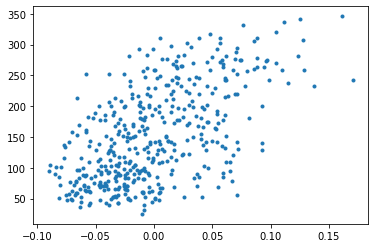

In [4]:
x1 = diabetes.data[:,2] #혈압
x2 = diabetes.target #당뇨진행정도
plt.plot(x1,x2,'.')

In [5]:
cen = [[-0.05,0.0,0.05,0.1],[50,120,150,250]]
c1 = [-0.05,50]; c2 = [0.0,120]; c3 = [0.05,200]; c4 = [0.1,280]

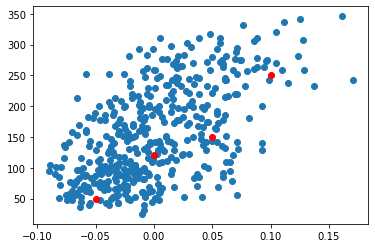

In [6]:
plt.scatter(x1,x2)
plt.plot(cen[0],cen[1],'ro')

In [7]:
r1 = (x1-c1[0])**2 + (x2-c1[1])**2
r2 = (x1-c2[0])**2 + (x2-c2[1])**2
r3 = (x1-c3[0])**2 + (x2-c3[1])**2
r4 = (x1-c4[0])**2 + (x2-c4[1])**2
g = np.array([])
for i in range(len(r1)):
    g = np.append(g,np.argmin([r1[i],r2[i],r3[i],r4[i]]))

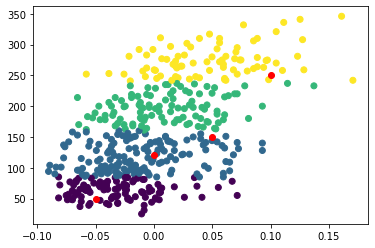

In [8]:
plt.scatter(x1,x2,c=g)
plt.plot(cen[0],cen[1],'ro')

In [9]:
a = []
for j in range(4):
    a.append([np.mean([x1[i] for i in np.where(g==j)]),np.mean([x2[i] for i in np.where(g==j)])])

In [10]:
a

[[-0.030548238144024083, 62.41509433962264],
 [-0.011652497815819743, 118.90666666666667],
 [0.010418788701883012, 196.4433962264151],
 [0.048519953915494504, 274.6]]

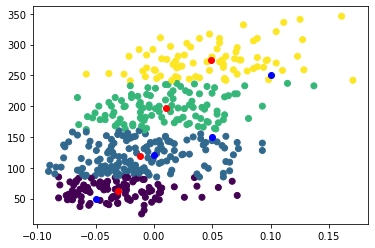

In [11]:
plt.scatter(x1,x2,c=g)
plt.plot(cen[0],cen[1],'bo')
plt.plot([i[0] for i in a],[i[1] for i in a],'ro')

[[-0.029111651380724322, 65.9430894308943], [-0.009573072475141614, 121.74418604651163], [0.007150857172285911, 193.9158878504673], [0.04880141869502907, 273.2289156626506]]
[[-0.028371036021572742, 67.51908396946565], [-0.009083088845424216, 123.72727272727273], [0.007076796565162096, 193.13333333333333], [0.04791289211505865, 272.32941176470587]]
[[-0.027896922122661393, 68.50735294117646], [-0.00974081237811257, 125.55084745762711], [0.006760125112978988, 192.64], [0.04849300861364749, 270.9886363636364]]
[[-0.02807655746830821, 70.0625], [-0.00818520903511682, 127.66363636363636], [0.006199882796208651, 191.83673469387756], [0.048175652836338116, 270.1222222222222]]
[[-0.028059523082083076, 70.2551724137931], [-0.008025380021992528, 127.93577981651376], [0.006199882796208651, 191.83673469387756], [0.048175652836338116, 270.1222222222222]]
[[-0.027776859723275003, 70.64625850340136], [-0.008039241962409413, 128.47663551401868], [0.006199882796208651, 191.83673469387756], [0.04817565

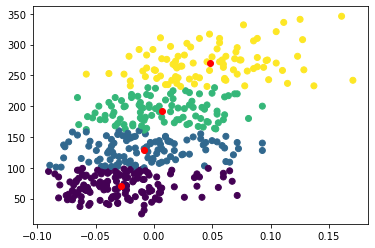

In [12]:
#중심점 4개의 위치가 바뀌지 않는 것을 확인하기 위해서 print(a)를 넣었습니다.
for p in range(20):
    c1 = a[0][0], a[0][1]
    c2 = a[1][0], a[1][1]
    c3 = a[2][0], a[2][1]
    c4 = a[3][0], a[3][1]
    r1 = (x1-c1[0])**2 + (x2-c1[1])**2
    r2 = (x1-c2[0])**2 + (x2-c2[1])**2
    r3 = (x1-c3[0])**2 + (x2-c3[1])**2
    r4 = (x1-c4[0])**2 + (x2-c4[1])**2
    g = np.array([])
    for i in range(len(r1)):
        g = np.append(g,np.argmin([r1[i],r2[i],r3[i],r4[i]]))

    a = []
    for j in range(4):
        a.append([np.mean([x1[i] for i in np.where(g==j)]),np.mean([x2[i] for i in np.where(g==j)])])
    print(a)

plt.scatter(x1,x2,c=g)
plt.plot([i[0] for i in a],[i[1] for i in a],'ro')

In [13]:
from sklearn.cluster import KMeans

In [14]:
km = KMeans(n_clusters = 4)
X = [x1,x2]
data = np.transpose(X)

In [15]:
km.fit(data)

KMeans(n_clusters=4)

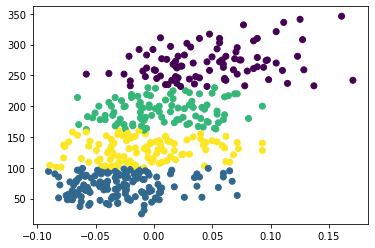

In [16]:
plt.scatter(x1,x2,c=km.labels_)